# Introduction to the Modeling and Analysis of Complex Systems
Models can be **discrete-time** or **continuous-time**. A continuous time model is represented by a standard differential equation. A discrete-time model is represented by a difference equation.

Differential equation: $\frac{dx}{dt}=F(x, t)$

Difference equation: $x_{t+1}=F(x_t, t)$

A standard differential equation that you must know is:

$$\frac{dx}{dt}=bx\implies x(t)=Ae^{bt}$$

This relationship can be stated as: If the rate of change of a value x is a constant multiple of value of x then its growth is exponential.

Sayama imagines a system in which A and B can be blue or red. A tries to be the same colour as B. B tries to be a different colour from red. The following are _state transition functions_ describing the system dynamics over time:

$$S_A(t) = S_B(t-1)$$
$$S_B(t) = S_A(t-1)$$

The state of A at any time t depends on the state of B at time t-1, and vice versa for B.

Sayam identifies the following equation types for models:

___
**Linear system**

Of the form $x=mt+c$ where m or c or both could be zero.

**Non-linear system**

Anything not of the above form, e.g. involving exponents (or roots), trig functions, etc.

___
**First-order system**

A difference equation whose rules involve the state at time t-1 only.

**Higher-order system**

Anything else (eg a system whose state at time t depends on the its state at times t-1 _and_ t-2)

___
**Autonomous**

A system whose equation doesn't include t as an explicit term. (Note that $x_t$ doesn't count as including t.)

**Non-autonomous**

A system whose equation does refer to t explicitly.

___
A system can simultaneously be classified as linear or non-linear, first-order or higher-order, autonomous or non-autonomous.

**Two important points:**

1. Non-autonomous, higher-order systems can always be converted to autonomous, first-order systems
2. Linear equations are always soluble analytically. Non-linear equations are generally not.

Example:

$$x_t=x_{t-1}+x_{t-2}$$

This is the Fibonacci sequence and it is a higher-order difference equation since it features a reference to t-2. However, if we add another state variable y such that $y=x_{t-1}$ then we can rewrite the equation as first-order.

$$x_t=x_{t-1}+y_{t-1}$$
$$y_t=x_{t-1}$$

An _analytical solution_ involves writing $x_t=f(t)$ ("closed form") such that the RHS of the equation doesn't contain any state variables (in this case x). This is useful because we can determine the state of the system x at any time t without having to know what the system was like immediately before ($x_{t-1}$). This is impossible for most non-linear systems, hence the need for simulations.

_"Linear dynamical systems can only show exponential growth/decay, periodic oscillation, stationary states (no change), or their hybrids (e.g. exponentially growing oscillation). If you observe these behaviours, you may be able to assume that the underlying rules are linear."_

Pages 52-54 give an excellent breakdown of how to build a model that demonstrates some particular set of basic behaviour. Sayama begins by suggesting that we build a model which

1. shows exponential growth
2. converges to some maximum value after which there is no growth

He gets the exponential growth simply

$$x_t=ax_{t-1}$$

He then suggests that to reach a maximum value of x there has to be a point at which the growth rate of x is equal to 1 so that $x_t=x_{t-1}$.

The growth rate function is unknown at this point so we just call it $f(x_{t-1})$. Hence the equation of our model is going to be of the form

$$x_t = f(x_{t-1})x_{t-1}$$

Thinking now only about the growth rate function $f(x_{t-1})$, it is clear the growth should be unhindered when the population is small, but equal to one when the population gets close to its maximum size (known as its _carrying capacity_), which we will refer to as K. So we can say that two points (x, f(x)) are (K, 1). It is important to realize that we are not talking about the behaviour of our model here; we are talking about the behaviour of the function that we are trying to think of that will give us the convergent behaviour of our model.

The simplest function that goes through points (0, a) and (K, 1) is a straight line $f(x)=mx+c$ where we can use the slope formula $m=\frac{y_2-y_1}{x_2-x_1}$ to find its slope and the intercept c is equal to a since the function goes through (0, a). Using the points (0, a) and (K, 1) this gives

$$f(x)=\frac{1-a}{K}x+a$$

which is more often written

$$f(x)=-\frac{a-1}{K}x+a$$

This is known as the **logistic equation**. 


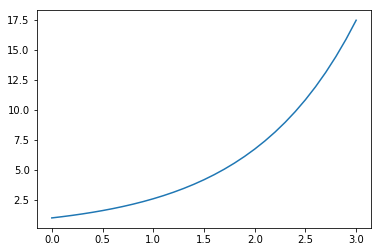

Done


In [2]:
import matplotlib.pylab as pylab

a = 1.1

def initialize():
    global x, result, t, timesteps
    x = 1
    result = [x]
    t = 0
    timesteps = [t]

def observe():
    global x, result
    result.append(x)
    timesteps.append(t)

def update():
    global x, result, t, timesteps
    x = a * x
    t = t + 0.1

initialize()
while t < 3:
    update()
    observe()

pylab.plot(timesteps, result)
pylab.show()

print("Done")

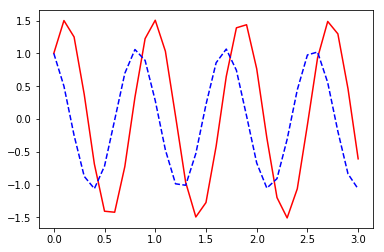

Done


In [3]:
import matplotlib.pylab as pylab

a = 1.1

def initialize():
    global x, y, resultx, resulty, t, timesteps
    x = 1
    y = 1
    resultx = [x]
    resulty = [y]
    t = 0
    timesteps = [t]

def observe():
    global x, y, resultx, resulty, t, timesteps
    resultx.append(x)
    resulty.append(y)
    timesteps.append(t)

def update():
    # This is Lotka-Volterra with x as predator, y as prey. The populations can go below zero.
    global x, y, resultx, resulty, t, timesteps
    nextx = 0.5 * x + y
    nexty = -0.5 * x + y
    x, y = nextx, nexty
    t = t + 0.1

initialize()
while t < 3:
    update()
    observe()

pylab.plot(timesteps, resultx, 'r-')
pylab.plot(timesteps, resulty, 'b--')
# pylab.plot(resultx, resulty)
pylab.show()

print("Done")

